In [1]:
import pandas as pd
import string
import warnings
warnings.filterwarnings("ignore")
PUNCT_TO_REMOVE = string.punctuation + '\n\t' + '…'
#print(PUNCT_TO_REMOVE)
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))
from nltk.corpus import stopwords
#print(", ".join(stopwords.words('english')))
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

import re

def remove_numbers(text):
    return re.sub(r'\d+', '', text)

def remove_urls(text):
    return re.sub(r"http\S+", "", text)


In [3]:
tweets = pd.read_csv("tweets/covid19_tweets.csv")
tweets = tweets[['text']]
tweets.text = tweets.text.apply(str)
tweets.text = tweets.text.str.lower()
tweets.text = tweets.text.apply(lambda tweet: remove_urls(tweet))
tweets.text = tweets.text.apply(lambda tweet: remove_punctuation(tweet))
tweets.text = tweets.text.apply(lambda tweet: remove_numbers(tweet))
tweets.text = tweets.text.apply(lambda tweet: lemmatize_words(tweet))
tweets.text = tweets.text.apply(lambda tweet: remove_stopwords(tweet))
tweets.head()

,text
0,smelled scent hand sanitizers today someone pa...
1,hey yankee yankeespr mlb wouldnt made sense pl...
2,diane wdunlap realdonaldtrump trump never clai...
3,brookbanktv one gift covid ha give appreciatio...
4,july medium bulletin novel coronavirusupdates ...


In [139]:
from nltk.tokenize import WordPunctTokenizer
tokenizer = WordPunctTokenizer()
tweet_tok = []
for string in tweets.text:
    tweet_tok.append([el.lower() for el in tokenizer.tokenize(string)])
#tweet_tok[:2]

In [36]:
# get 1000 most frequent words with the length 4 or more
from collections import Counter
cnt = Counter()
for tweet in tweets.text.values:
    for word in tweet.split():
        if len(word) >= 4 and ('’' not in list(word)):
            cnt[word] += 1
        
most_common_words = cnt.most_common(1000)

In [115]:
from sklearn.cluster import KMeans
from gensim.models import Word2Vec
import numpy as np
model =  Word2Vec.load("word2vec.model")
word_vectors = []
for word in most_common_words[:200]:
    vector = model.wv[str(word[0])]
    word_vectors.append(vector)
word_vectors = np.array(word_vectors)
kmeans = KMeans(n_clusters=3, random_state=0).fit(word_vectors)
labels = kmeans.labels_

In [126]:
possible_labels = list(set(labels))
print(possible_labels)
maxim = 0
maxword = ''
for i in range(100):
    word = most_common_words[i]
    if labels[i] == possible_labels[1]:
        print(word[0])
        if word[1] > maxim:
            maxim = word[1]
            maxword = word[0]
print(maxim, maxword)

[0, 1, 2]
people
mask
need
time
like
help
trump
school
realdonaldtrump
many
know
take
still
home
life
work
make
back
good
going
dont
would
want
please
child
could
think
face
safe
public
keep
family
look
right
wear
thing
every
social
well
great
9285 people


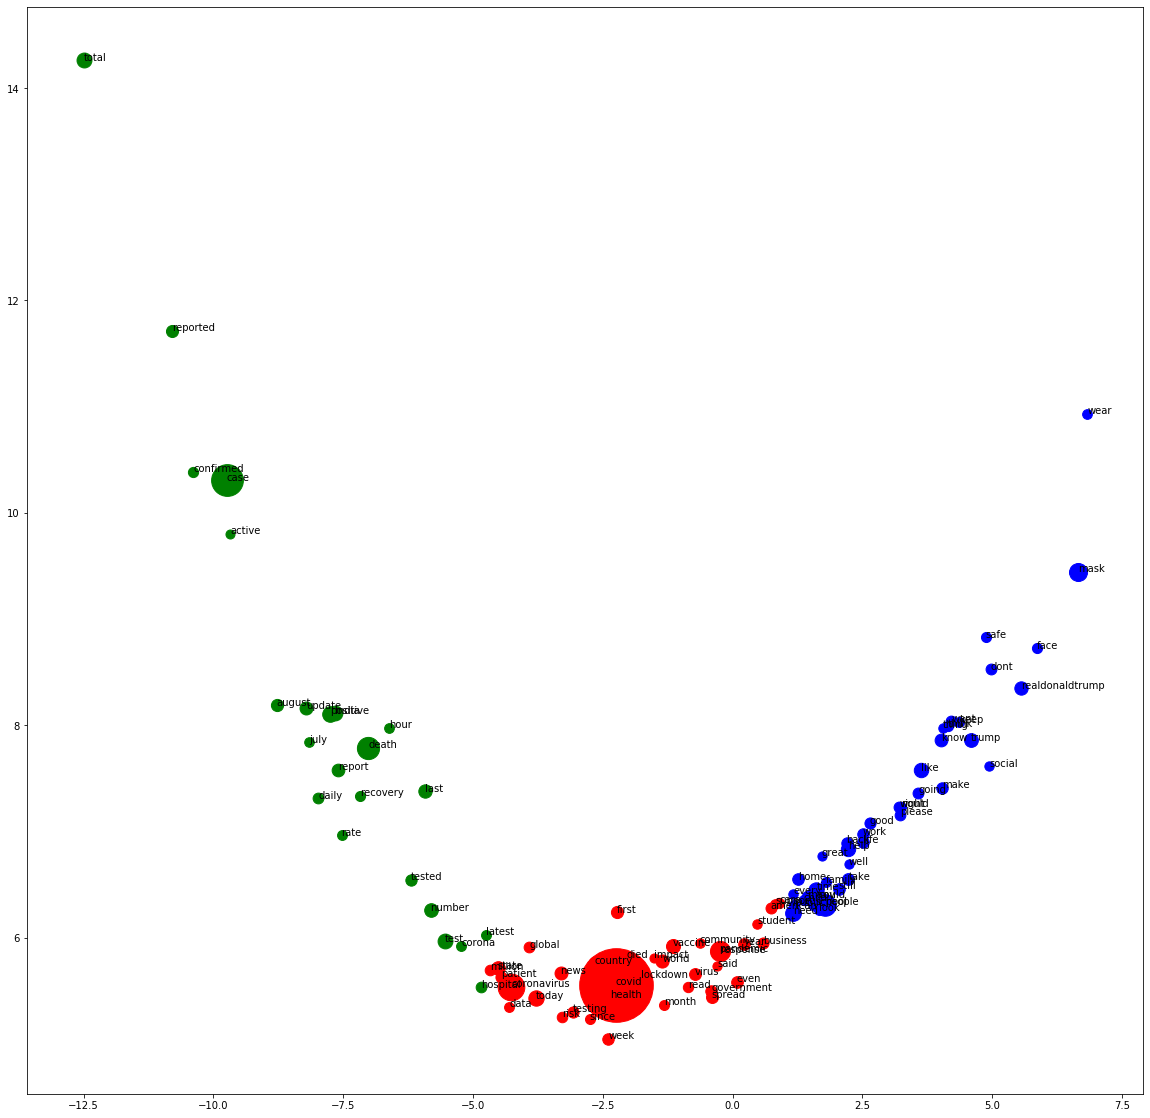

In [117]:
# train word2vec
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 20))
colors = ['red', 'blue', 'green', 'orange', 'brown']
for i in range(100):
    word = most_common_words[i]
    vector = model.wv[str(word[0])]
    plt.scatter([vector[0]], [vector[1]], label=word[0], s=float(word[1])/20., color=colors[labels[i]])
    plt.text(vector[0], vector[1], s=word[0]) 
plt.savefig("covid_img.png")

In [71]:
appearance_matrix = np.genfromtxt('appearance_matrix.csv', delimiter=',', dtype=int)

In [108]:
diagonal = appearance_matrix.diagonal()
division_matrix = np.zeros((1000, 1000))
for i in range(1000):
    for j in range(1000):
        division_matrix[i, j] = diagonal[min(i, j)]
appearance_matrix  = appearance_matrix.astype(float) / division_matrix.astype(float)
np.mean(appearance_matrix)

0.003333383599768139

In [109]:
np.median(appearance_matrix)

0.0011605415860735009

In [112]:
adjacency_matrix = appearance_matrix > 0.02
adjacency_matrix.sum()

9412

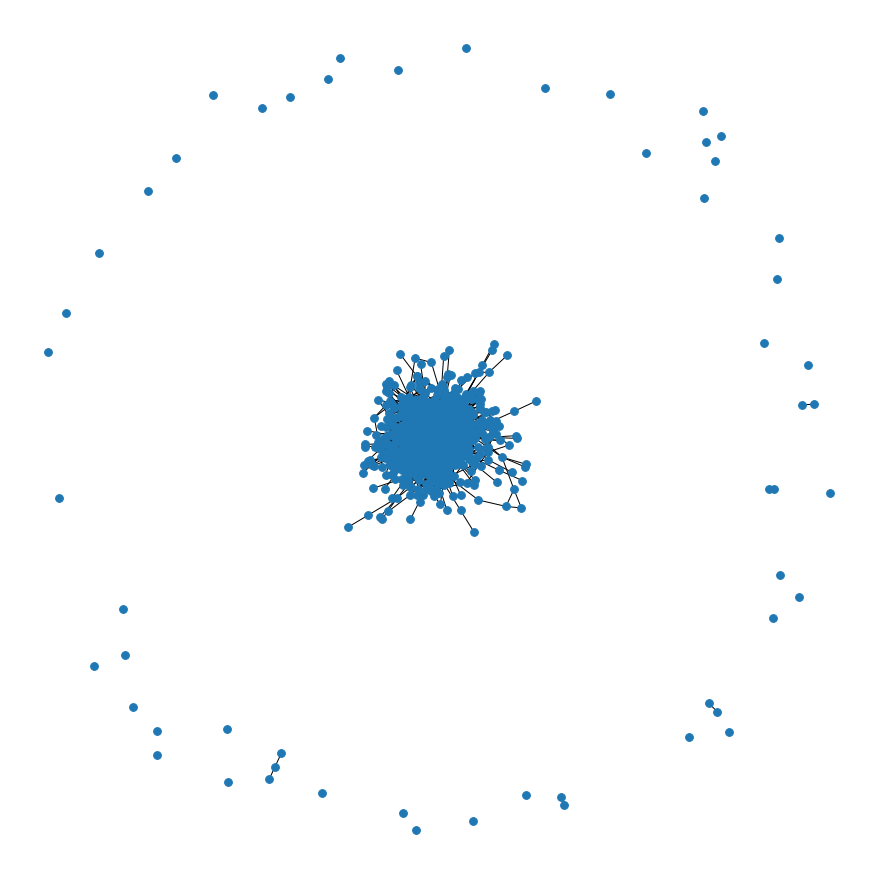

In [113]:
import networkx as nx
graph = nx.convert_matrix.from_numpy_matrix(adjacency_matrix)
plt.figure(3,figsize=(12,12)) 
nx.draw(graph, node_size=60,font_size=8)

In [4]:
a = pd.read_csv("first_data_covid.csv") # 0 for fake
b = pd.read_excel("fake_new_dataset.xlsx").drop(columns=['Unnamed: 0', 'subcategory']) #0 for fake
b['headlines'] = b['title'] + ' ' + b['text']
b['outcome'] = b['label']
b = b.drop(columns=['title', 'text', 'label'])
data = pd.concat([a, b])
data['headlines'] = data["headlines"].str.lower()
data['headlines'] = data['headlines'].apply(str)
data["headlines"] = data["headlines"].apply(lambda text: remove_punctuation(text))
data["headlines"] = data["headlines"].apply(lambda text: lemmatize_words(text))
data["headlines"] = data["headlines"].apply(lambda text: remove_stopwords(text))
data.head()

,headlines,outcome
0,post claim compulsory vacination violates prin...,0
1,photo claim person doctor died attending many ...,0
2,post video claim protest confination town aran...,0
3,death respiratory failure pneumonia registered...,0
4,dean college biologist euskadi state lot pcr f...,0


In [5]:
from collections import Counter
cnt = Counter()
for text in data["headlines"].values:
    for word in text.split():
        if len(word) >= 4:
            cnt[word] += 1
data_common = cnt.most_common(1000)

In [6]:
data_common

[('virus', 13245),
 ('coronavirus', 11271),
 ('china', 9275),
 ('health', 7328),
 ('people', 6669),
 ('case', 6375),
 ('corona', 6185),
 ('said', 5405),
 ('covid19', 4650),
 ('wuhan', 4246),
 ('outbreak', 4099),
 ('chinese', 4096),
 ('also', 4067),
 ('disease', 3420),
 ('patient', 3360),
 ('country', 3360),
 ('spread', 3323),
 ('2019ncov', 3259),
 ('infection', 2968),
 ('hospital', 2753),
 ('time', 2701),
 ('government', 2666),
 ('world', 2641),
 ('novel', 2610),
 ('state', 2519),
 ('death', 2426),
 ('first', 2423),
 ('public', 2404),
 ('confirmed', 2355),
 ('infected', 2348),
 ('city', 2346),
 ('medical', 2324),
 ('number', 2093),
 ('would', 1952),
 ('reported', 1937),
 ('vaccine', 1908),
 ('respiratory', 1895),
 ('symptom', 1889),
 ('year', 1861),
 ('2020', 1776),
 ('travel', 1767),
 ('like', 1761),
 ('could', 1749),
 ('market', 1749),
 ('mask', 1748),
 ('human', 1748),
 ('including', 1612),
 ('measure', 1604),
 ('global', 1598),
 ('report', 1563),
 ('january', 1559),
 ('many', 1528)

In [8]:
fake = data[data['outcome'] == 1]
real = data[data['outcome'] == 0]
Counter(data['outcome']) #0 for true news, 1 for fake news

Counter({0: 10785, 1: 2535})

In [53]:
emo_words = ['good', 'well', 'great', 'best', 'hope', 'love', 'hard', 'relief', 'fear', 'worst']
real_emo_dict = dict(zip(emo_words, list(range(10))))
for text in real["headlines"].values:
    for word in text.split():
        if word in emo_words:
            real_emo_dict[word] += 1
real_emo_dict

{'good': 364,
 'well': 535,
 'great': 170,
 'best': 237,
 'hope': 154,
 'love': 80,
 'hard': 120,
 'relief': 106,
 'fear': 320,
 'worst': 75}

In [54]:
emo_words = ['good', 'well', 'great', 'best', 'hope', 'love', 'hard', 'relief', 'fear', 'worst']
fake_emo_dict = dict(zip(emo_words, list(range(10))))
for text in fake["headlines"].values:
    for word in text.split():
        if word in emo_words:
            fake_emo_dict[word] += 1
fake_emo_dict

{'good': 409,
 'well': 726,
 'great': 136,
 'best': 244,
 'hope': 139,
 'love': 35,
 'hard': 117,
 'relief': 54,
 'fear': 316,
 'worst': 70}

In [55]:
import numpy as np
real_data = np.array(list(real_emo_dict.values()))
sum_real = real_data.sum() * 0.01
real_data = np.array(real_data//sum_real, dtype=int)
fake_data = np.array(list(fake_emo_dict.values()))
sum_fake = fake_data.sum() * 0.01
fake_data = np.array(fake_data//sum_fake, dtype=int)

df = pd.DataFrame(list(zip(emo_words, real_data, fake_data)), 
                  columns=['group', 'value', 'value2'])

df.to_csv('emo_data.csv', index=False)

In [56]:
df

,group,value,value2
0,good,16,18
1,well,24,32
2,great,7,6
3,best,10,10
4,hope,7,6
5,love,3,1
6,hard,5,5
7,relief,4,2
8,fear,14,14
9,worst,3,3


In [57]:
reg_words = ['covid19', 'case', 'coronavirus', 'death', 'pandemic', 'mask', 'health', 'positive', 'test', 'vaccine']
real_reg_dict = dict(zip(reg_words, list(range(10))))
for text in real["headlines"].values:
    for word in text.split():
        if word in reg_words:
            real_reg_dict[word] += 1
real_reg_dict

{'covid19': 4234,
 'case': 1833,
 'coronavirus': 6007,
 'death': 1068,
 'pandemic': 1067,
 'mask': 841,
 'health': 1993,
 'positive': 440,
 'test': 586,
 'vaccine': 1252}

In [58]:
reg_words = ['covid19', 'case', 'coronavirus', 'death', 'pandemic', 'mask', 'health', 'positive', 'test', 'vaccine']
fake_reg_dict = dict(zip(reg_words, list(range(10))))
for text in fake["headlines"].values:
    for word in text.split():
        if word in reg_words:
            fake_reg_dict[word] += 1
fake_reg_dict

{'covid19': 416,
 'case': 4544,
 'coronavirus': 5268,
 'death': 1364,
 'pandemic': 348,
 'mask': 917,
 'health': 5347,
 'positive': 511,
 'test': 696,
 'vaccine': 674}

In [59]:
import numpy as np
real_data = np.array(list(real_reg_dict.values()))
sum_real = real_data.sum() * 0.01
real_data = np.array(real_data//sum_real, dtype=int)
fake_data = np.array(list(fake_reg_dict.values()))
sum_fake = fake_data.sum() * 0.01
fake_data = np.array(fake_data//sum_fake, dtype=int)

df_reg = pd.DataFrame(list(zip(reg_words, real_data, fake_data)), 
                  columns=['group', 'value', 'value2'])

df_reg.to_csv('reg_data.csv', index=False)

In [60]:
df_reg

,group,value,value2
0,covid19,21,2
1,case,9,22
2,coronavirus,31,26
3,death,5,6
4,pandemic,5,1
5,mask,4,4
6,health,10,26
7,positive,2,2
8,test,3,3
9,vaccine,6,3


In [61]:
from collections import Counter
cnt = Counter()
for text in data["headlines"].values:
    for word in text.split():
        if len(word) >= 8:
            cnt[word] += 1
data_common = cnt.most_common(1000)

In [62]:
term_words = ['infection', 'respiratory', 'transmission', 'prevention', 'spreading',
            'clinical', 'influenza', 'antibody', 'pathogen', 'biological']
fake_term_dict = dict(zip(term_words, list(range(10))))
for text in fake["headlines"].values:
    for word in text.split():
        if word in term_words:
            fake_term_dict[word] += 1
fake_term_dict

{'infection': 1919,
 'respiratory': 1386,
 'transmission': 583,
 'prevention': 575,
 'spreading': 479,
 'clinical': 292,
 'influenza': 238,
 'antibody': 94,
 'pathogen': 206,
 'biological': 75}

In [63]:
real_term_dict = dict(zip(term_words, list(range(15))))
for text in real["headlines"].values:
    for word in text.split():
        if word in term_words:
            real_term_dict[word] += 1
real_term_dict

{'infection': 1049,
 'respiratory': 511,
 'transmission': 207,
 'prevention': 174,
 'spreading': 248,
 'clinical': 226,
 'influenza': 158,
 'antibody': 297,
 'pathogen': 172,
 'biological': 191}

In [64]:
import numpy as np
real_data = np.array(list(real_term_dict.values()))
sum_real = real_data.sum() * 0.01
real_data = np.array(real_data//sum_real, dtype=int)
fake_data = np.array(list(fake_term_dict.values()))
sum_fake = fake_data.sum() * 0.01
fake_data = np.array(fake_data//sum_fake, dtype=int)

df_term = pd.DataFrame(list(zip(term_words, real_data, fake_data)), 
                  columns=['group', 'value', 'value2'])

df_term.to_csv('term_data.csv', index=False)

In [65]:
df_term

,group,value,value2
0,infection,32,32
1,respiratory,15,23
2,transmission,6,9
3,prevention,5,9
4,spreading,7,8
5,clinical,6,4
6,influenza,4,4
7,antibody,9,1
8,pathogen,5,3
9,biological,5,1


In [16]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

stopwords_ = set(STOPWORDS)
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        collocations=False,
        background_color='white',
        stopwords=stopwords_,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

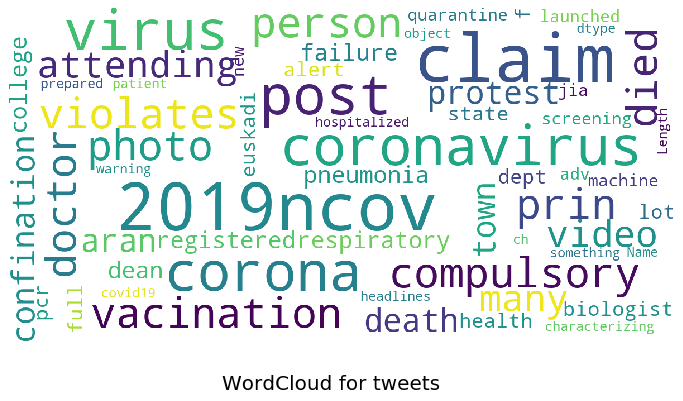

In [17]:
show_wordcloud(data['headlines'], "WordCloud for tweets") #simple visualization for the most common words

In [18]:
total_strings= ' '.join(data['headlines'].values).split()
total_strings[10:20], len(set(total_strings))

(['pcr',
  'test',
  'return',
  'many',
  'false',
  'positive',
  'influenza',
  'vaccine',
  'related',
  'covid19'],
 70380)

In [19]:
from nltk import bigrams

bigrams = list(map(" ".join, list(bigrams(total_strings))))

In [20]:
total = total_strings + bigrams
total[-2:]

['ownership education', 'education child']

In [ ]:
# get word2vec for words and for bigrams

In [ ]:
def populate_bigram_scatter(perplexity):
    X_embedded = TSNE(n_components=2, perplexity=perplexity).fit_transform(vects_df)

    embed_df['tsne_1'] = X_embedded[:, 0]
    embed_df['tsne_2'] = X_embedded[:, 1]
    fig = px.scatter(embed_df, x='tsne_1', y='tsne_2', hover_name='bigram', text='bigram', size='count', color='words', size_max=45
                     , template='plotly_white', title='Bigram similarity and frequency', labels={'words': 'Avg. Length<BR>(words)'}
                     , color_continuous_scale=px.colors.sequential.Sunsetdark)
    fig.update_traces(marker=dict(line=dict(width=1, color='Gray')))
    fig.update_xaxes(visible=False)
    fig.update_yaxes(visible=False)
    return fig

In [126]:
for word in total:
    cnt[word] += 1
        
cnt.most_common(50) #most common words including bigrams

[('corona virus', 31283),
 ('virus', 26488),
 ('coronavirus', 22534),
 ('ha', 20024),
 ('china', 18548),
 ('health', 14656),
 ('wa', 13900),
 ('novel coronavirus', 13650),
 ('people', 13338),
 ('case', 12750),
 ('corona', 12370),
 ('said', 10808),
 ('new', 9504),
 ('covid19', 9300),
 ('wuhan', 8492),
 ('outbreak', 8198),
 ('chinese', 8192),
 ('also', 8134),
 ('public health', 7371),
 ('disease', 6838),
 ('new coronavirus', 6811),
 ('country', 6718),
 ('patient', 6712),
 ('spread', 6644),
 ('confirmed case', 6573),
 ('2019ncov', 6518),
 ('one', 6098),
 ('infection', 5936),
 ('world health', 5789),
 ('u', 5600),
 ('hospital', 5504),
 ('time', 5402),
 ('united state', 5397),
 ('government', 5330),
 ('world', 5280),
 ('novel', 5220),
 ('state', 5038),
 ('hong kong', 4851),
 ('death', 4850),
 ('first', 4846),
 ('public', 4808),
 ('health organization', 4802),
 ('coronavirus outbreak', 4795),
 ('day', 4732),
 ('confirmed', 4710),
 ('infected', 4696),
 ('city', 4692),
 ('coronavirus 2019ncov'

most_common_words

In [132]:
#india, italy, china, russia, australia, japan, newzealand
import pyLDAvis as pyvis

In [152]:
top20words = []
for word in data_common[:20]:
    top20words.append(word[0])
top20words = dict(zip(top20words, range(20)))
top20words

{'virus': 0,
 'coronavirus': 1,
 'china': 2,
 'health': 3,
 'people': 4,
 'case': 5,
 'corona': 6,
 'said': 7,
 'covid19': 8,
 'wuhan': 9,
 'outbreak': 10,
 'chinese': 11,
 'also': 12,
 'disease': 13,
 'patient': 14,
 'country': 15,
 'spread': 16,
 '2019ncov': 17,
 'infection': 18,
 'hospital': 19}

In [154]:
from nltk.tokenize import WordPunctTokenizer
tokenizer = WordPunctTokenizer()

fake_tok = np.zeros(20)
keys = top20words.keys()
for string in fake.headlines:
    current_fake_words = [el.lower() for el in tokenizer.tokenize(string)]
    for word in current_fake_words:
        if word in keys:
            fake_tok[top20words[word]] += 1
fake_tok

array([8781., 5434., 6933., 5382., 3708., 4551., 4233., 3542.,  422.,
       2893., 2752., 2663., 2655., 2202., 1974., 2444., 2255., 2645.,
       1953., 1665.])

In [155]:
real_tok = np.zeros(20)
keys = top20words.keys()
for string in real.headlines:
    current_real_words = [el.lower() for el in tokenizer.tokenize(string)]
    for word in current_real_words:
        if word in keys:
            real_tok[top20words[word]] += 1
real_tok

array([4991., 6126., 2997., 2001., 3179., 1837., 2226., 1996., 4293.,
       1439., 1435., 1475., 1420., 1279., 1447., 1111., 1094.,  685.,
       1063., 1129.])